In [11]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

In [13]:
# Loading the Iris Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

In [15]:
# Display dataset information
print(f"Dataset shape: {X.shape}")
print(X.head())

Dataset shape: (150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [17]:

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preprocessing completed successfully!")

Data preprocessing completed successfully!


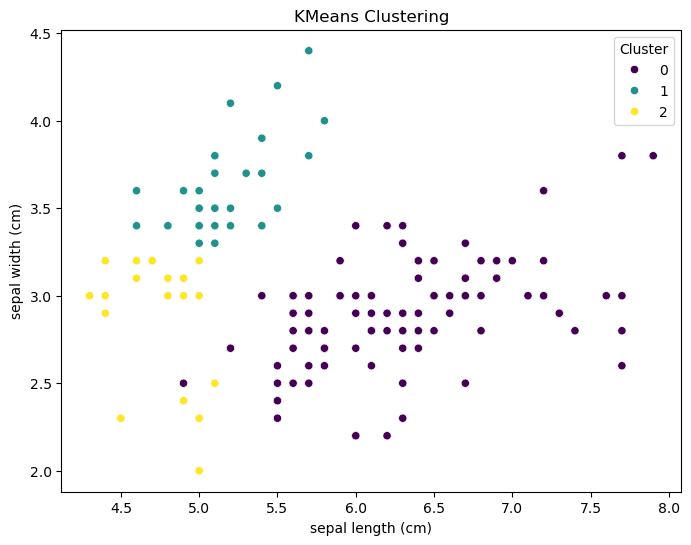

In [29]:
# Adding cluster labels to the dataset
X["KMeans_Cluster"] = kmeans_labels

# Visualizing KMeans Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=kmeans_labels, palette="viridis")
plt.title("KMeans Clustering")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title="Cluster")
plt.show()

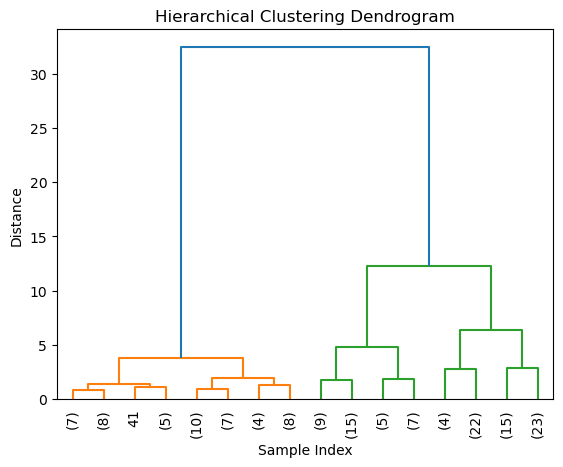

In [33]:
# 2. Hierarchical Clustering
## Description of Hierarchical Clustering:
# Hierarchical clustering builds a tree-like structure of data points, grouping them based on similarity. It can be agglomerative (bottom-up) or divisive (top-down).

# Applying Hierarchical Clustering
linkage_matrix = linkage(X.iloc[:, :-1], method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

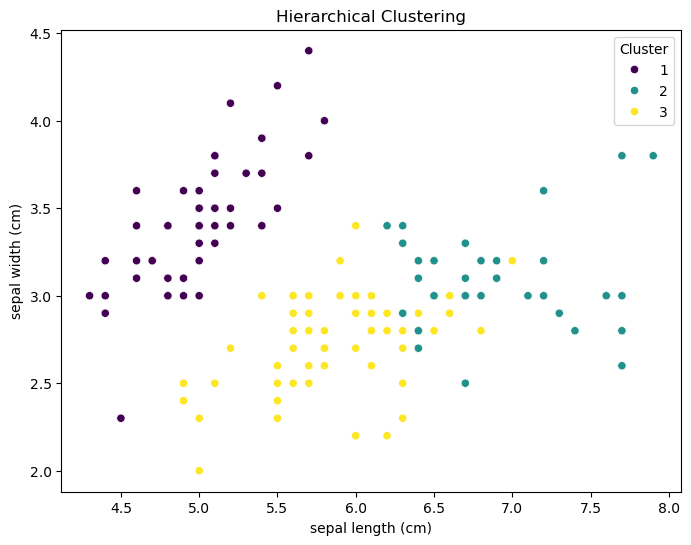

In [35]:
# Assigning Clusters using Hierarchical Clustering
hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
X["Hierarchical_Cluster"] = hierarchical_labels

# Visualizing Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=hierarchical_labels, palette="viridis")
plt.title("Hierarchical Clustering")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title="Cluster")
plt.show()

In [37]:
# Conclusion
print("KMeans Clusters Distribution:")
print(X["KMeans_Cluster"].value_counts())
print("\nHierarchical Clusters Distribution:")
print(X["Hierarchical_Cluster"].value_counts())

KMeans Clusters Distribution:
KMeans_Cluster
0    96
1    33
2    21
Name: count, dtype: int64

Hierarchical Clusters Distribution:
Hierarchical_Cluster
3    64
1    50
2    36
Name: count, dtype: int64
